<a href="https://colab.research.google.com/github/3ndung/NLP_CLASSIFICATION_LSTM_SIMPLE/blob/main/KLASIFIKASI_TEXT_JUDUL_BERITA_NLP_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
STOPWORDS = set()

with open('/content/INDONESIAN_STOP_WORD.txt') as dat:
  dat = dat.read()
  for x in dat.split(' '):
    STOPWORDS.add(x)

In [2]:
import pandas as pd

In [3]:
data = pd.read_excel('/content/DATA_BERSIH1.xlsx')

In [4]:
data = data[['CATEGORY','HEADLINE_CLEAN']]
data.loc[data["CATEGORY"] == "OLAH RAGA", "CATEGORY"] = 'OLAHRAGA'
data = data.sample(frac=1).reset_index(drop=True)
data.head(10)

,CATEGORY,HEADLINE_CLEAN
0,EKONOMI,BPJamsostek Perluas Kemudahan Daftar dan Bayar...
1,KESEHATAN,BPOM Cemaran Etilen Glikol Obat Yarindo Sampai...
2,OLAHRAGA,Messi Ungkap Momen Terindah Sampai Bikin Dia N...
3,EKONOMI,Situasi Global Masih Tidak Pasti Rupiah Ditutu...
4,KESEHATAN,5 Kebiasaan Penyebab Sariawan Bukan Kurang Mak...
5,OLAHRAGA,5 Atlet Dunia yang Jadi Mualaf dan Nikahi Pere...
6,EKONOMI,BI Catat Permintaan Pembiayaan Korporasi Menin...
7,OLAHRAGA,5 Point Guard yang Akan Mengguncang NBA 202220...
8,OLAHRAGA,Liga 1 Rencananya Lanjut dengan Format Sentral...
9,OLAHRAGA,Fred Hubungan Ronaldo dengan Ten Hag Kini


In [5]:
labels = data['CATEGORY'].tolist()
articles = data['HEADLINE_CLEAN'].tolist()

In [6]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [7]:
import csv
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from nltk.corpus import stopwords
#STOPWORDS = set(stopwords.words('english'))

Put the hyparameters at the top like this to make it easier to change and edit.

In [8]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

First, let's define two lists that containing articles and labels. In the meantime, we remove stopwords.

In [9]:
print(len(labels))
print(len(articles))

597
597


There are only 597 articles in the data. Then we split into training set and validation set, according to the parameter we set earlier, 80% for training, 20% for validation.

In [10]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

477
477
477
120
120


Tokenizer does all the heavy lifting for us. In our articles that it was tokenizing, it will take 5,000 most common words. oov_token is to put a special value in when an unseen word is encountered. This means I want "OOV" in bracket to be used to for words that are not in the word index. "fit_on_text" will go through all the text and create dictionary like this:

In [11]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

You can see that "OOV" in bracket is number 1, "said" is number 2, "mr" is number 3, and so on.

In [12]:
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'di': 2,
 '2022': 3,
 'ke': 4,
 'rupiah': 5,
 'ini': 6,
 'as': 7,
 'yang': 8,
 'dolar': 9,
 'dan': 10}

This process cleans up our text, lowercase, and remove punctuations.

After tokenization, the next step is to turn thoes tokens into lists of sequence.

In [13]:
train_sequences = tokenizer.texts_to_sequences(train_articles)

This is the 11th article in the training data that has been turned into sequences.

In [14]:
print(train_sequences[10])

[5, 125, 4, 811, 11, 9, 7, 274, 37, 45, 65, 46]


When we train neural networks for NLP, we need sequences to be in the same size, that's why we use padding. Our max_length is 200, so we use pad_sequences to make all of our articles the same length which is 200 in my example. That's why you see that the 1st article was 426 in length, becomes 200, the 2nd article was 192 in length, becomes 200, and so on.

In [15]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [16]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

9
200
10
200
12
200


In addtion, there is padding type and truncating type, there are all "post". Means for example, for the 11th article, it was 186 in length, we padded to 200, and we padded at the end, add 14 zeros.

In [17]:
print(train_sequences[10])

[5, 125, 4, 811, 11, 9, 7, 274, 37, 45, 65, 46]


In [18]:
print(train_padded[10])

[  5 125   4 811  11   9   7 274  37  45  65  46   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]


And for the 1st article, it was 426 in length, we truncated to 200, and we truncated at the end.

In [19]:
print(train_sequences[0])

[423, 773, 774, 121, 10, 271, 775, 29, 776]


In [20]:
print(train_padded[0])

[423 773 774 121  10 271 775  29 776   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]


Then we do the same for the validation sequences. Note that we should expect more out of vocabulary words from validation articles because word index were derived from the training articles.

In [21]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

120
(120, 200)


Now we are going to look at the labels. because our labels are text, so we will tokenize them, when training, labels are expected to be numpy arrays. So we will turn list of labels into numpy arrays like so:

In [22]:
print(set(labels))

{'OLAHRAGA', 'EKONOMI', 'KESEHATAN'}


In [23]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [24]:
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[1]
[3]
[2]
(477, 1)
[1]
[1]
[2]
(120, 1)


Before training deep neural network, we want to explore what our original article and article after padding look like. Running the following code, we explore the 11th article, we can see that some words become "OOV", because they did not make to the top 5,000.

In [25]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

rupiah lunglai ke rp15695 per dolar as imbas bunga the fed naik ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
---
Rupiah Lunglai ke Rp15695 per Dolar AS Imbas Bunga The Fed Naik


Now we can implement LSTM. Here is my code that I build a tf.keras.Sequential model and start with an embedding layer. An embedding layer stores one vector per word. When called, it converts the sequences of word indices into sequences of vectors. After training, words with similar meanings often have the similar vectors.

Next is how to implement LSTM in code. The Bidirectional wrapper is used with a LSTM layer, this propagates the input forwards and backwards through the LSTM layer and then concatenates the outputs. This helps LSTM to learn long term dependencies. We then fit it to a dense neural network to do classification.

This index-lookup is much more efficient than the equivalent operation of passing a one-hot encoded vector through a tf.keras.layers.Dense layer.

In [26]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In our model summay, we have our embeddings, our Bidirectional contains LSTM, followed by two dense layers. The output from Bidirectional is 128, because it doubled what we put in LSTM. We can also stack LSTM layer but I found the results worse.

In [27]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/30
15/15 - 16s - loss: 1.6062 - accuracy: 0.3417 - val_loss: 1.1804 - val_accuracy: 0.4250 - 16s/epoch - 1s/step
Epoch 2/30
15/15 - 3s - loss: 1.1117 - accuracy: 0.4025 - val_loss: 1.0904 - val_accuracy: 0.4250 - 3s/epoch - 212ms/step
Epoch 3/30
15/15 - 3s - loss: 1.0264 - accuracy: 0.4780 - val_loss: 0.9667 - val_accuracy: 0.5083 - 3s/epoch - 201ms/step
Epoch 4/30
15/15 - 3s - loss: 0.8120 - accuracy: 0.6792 - val_loss: 0.7371 - val_accuracy: 0.8000 - 3s/epoch - 214ms/step
Epoch 5/30
15/15 - 3s - loss: 0.4460 - accuracy: 0.8868 - val_loss: 0.6899 - val_accuracy: 0.6667 - 3s/epoch - 206ms/step
Epoch 6/30
15/15 - 3s - loss: 0.2320 - accuracy: 0.9350 - val_loss: 0.5374 - val_accuracy: 0.8250 - 3s/epoch - 200ms/step
Epoch 7/30
15/15 - 3s - loss: 0.1654 - accuracy: 0.9371 - val_loss: 0.4891 - val_accuracy: 0.8500 - 3s/epoch - 197ms/step
Epoch 8/30
15/15 - 3s - loss: 0.1032 - accuracy: 0.9644 - val_loss: 0.5162 - val_accuracy: 0.8333 - 3s/epoch - 203ms/step
Epoch 9/30
15/15 - 3s - l

In [29]:
import matplotlib.pyplot as plt


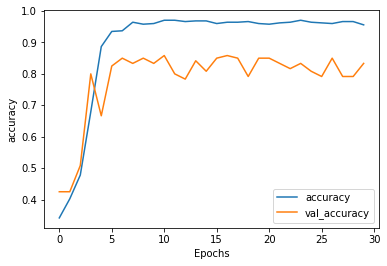

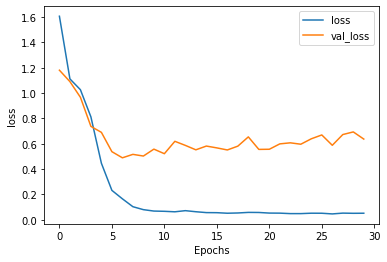

In [30]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

UJI

In [31]:
txt = ["3 Gabriel Arsenal di Piala Dunia 2022, Ada yang Beda Nasib"]

seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
labels = labels
print(pred)
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 1s 1s/step
[[5.4156268e-04 1.7549130e-01 6.8127459e-01 1.4160147e-01 1.6969338e-04
  9.2137809e-04]]
[[5.4156268e-04 1.7549130e-01 6.8127459e-01 1.4160147e-01 1.6969338e-04
  9.2137809e-04]] OLAHRAGA
